# Exploring Model Results

need to look properly at what the model is doing now. It would be interesting to look at bias and variance and see how this compares to other ML models. In theory and from looking at other competitions neural nets don't do as well at structured data scenarios but why?

In [45]:
%run LSTM_Model_4.py

Train on 834205 samples, validate on 10133 samples
Epoch 1/200
 - 30s - loss: 0.0057 - val_loss: 0.0023
Epoch 2/200
 - 29s - loss: 0.0023 - val_loss: 0.0022
Epoch 3/200
 - 29s - loss: 0.0022 - val_loss: 0.0021
Epoch 4/200
 - 29s - loss: 0.0022 - val_loss: 0.0020
Epoch 5/200
 - 29s - loss: 0.0021 - val_loss: 0.0020
Epoch 6/200
 - 29s - loss: 0.0021 - val_loss: 0.0020
Epoch 7/200
 - 29s - loss: 0.0021 - val_loss: 0.0021
Epoch 8/200
 - 29s - loss: 0.0021 - val_loss: 0.0020
Epoch 9/200
 - 29s - loss: 0.0021 - val_loss: 0.0019
Epoch 10/200
 - 29s - loss: 0.0020 - val_loss: 0.0019
Epoch 11/200
 - 29s - loss: 0.0020 - val_loss: 0.0020
Epoch 12/200
 - 29s - loss: 0.0020 - val_loss: 0.0019
Epoch 13/200
 - 29s - loss: 0.0020 - val_loss: 0.0020
Epoch 14/200
 - 29s - loss: 0.0020 - val_loss: 0.0018
Epoch 15/200
 - 29s - loss: 0.0020 - val_loss: 0.0019
Epoch 16/200
 - 29s - loss: 0.0020 - val_loss: 0.0018
Epoch 17/200
 - 29s - loss: 0.0020 - val_loss: 0.0019
Epoch 18/200
 - 29s - loss: 0.0020 - val

In [47]:
model.save('model/LSTM_Model_4.hdf5')

# Reload Later

In [5]:
# needed to reload the model
from keras import backend as K
def mean_squared_percentage_error(y_true, y_pred):
    return K.mean(K.square((y_true - y_pred) / K.clip(K.abs(y_true),
                                            K.epsilon(),
                                            None)), axis=-1)
mspe = MSPE = mean_squared_percentage_error


In [7]:
from keras.models import load_model
model = load_model('model/LSTM_Model_4.hdf5', 
                   custom_objects={'mean_squared_percentage_error': mean_squared_percentage_error})

#### Reload Data


In [36]:
# load
import pickle
import numpy as np
import pandas as pd
X_train = pickle.load(open( 'feat_table/xgb_1_x_train_table.pkl', "rb" ))
y_train = pickle.load(open( 'feat_table/xgb_1_y_train_table.pkl', "rb" ))
X_valid = pickle.load(open( 'feat_table/xgb_1_x_valid_table.pkl', "rb" ))
y_valid = pickle.load(open( 'feat_table/xgb_1_y_valid_table.pkl', "rb" ))
test = pickle.load(open( 'feat_table/xgb_1_test_table.pkl', "rb" ))
features = pickle.load(open( 'feat_table/xgb_1_features_vector_vector.pkl', "rb" ))

# Visualise the results

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  
sns.set(style="ticks")

In [10]:
X_train.groupby('Date').count()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,CompetitionOpen,PromoOpen,monthStr,IsPromoMonth
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,17,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,17,17
2013-01-02,1088,1088,1088,1088,1088,1088,1088,1088,1088,1088,...,1088,1088,1088,1088,1088,1088,1088,1088,1088,1088
2013-01-03,1093,1093,1093,1093,1093,1093,1093,1093,1093,1093,...,1093,1093,1093,1093,1093,1093,1093,1093,1093,1093
2013-01-04,1096,1096,1096,1096,1096,1096,1096,1096,1096,1096,...,1096,1096,1096,1096,1096,1096,1096,1096,1096,1096
2013-01-05,1096,1096,1096,1096,1096,1096,1096,1096,1096,1096,...,1096,1096,1096,1096,1096,1096,1096,1096,1096,1096
2013-01-06,19,19,19,19,19,19,19,19,19,19,...,19,19,19,19,19,19,19,19,19,19
2013-01-07,1091,1091,1091,1091,1091,1091,1091,1091,1091,1091,...,1091,1091,1091,1091,1091,1091,1091,1091,1091,1091
2013-01-08,1094,1094,1094,1094,1094,1094,1094,1094,1094,1094,...,1094,1094,1094,1094,1094,1094,1094,1094,1094,1094
2013-01-09,1091,1091,1091,1091,1091,1091,1091,1091,1091,1091,...,1091,1091,1091,1091,1091,1091,1091,1091,1091,1091


In [12]:
graph_set = X_train[X_train.Store.isin([4, 224, 721])]
reduced_set = graph_set[graph_set.Date < '2013-04-01']
reduced_set.shape

(222, 26)

/home/brian/anaconda3/envs/tensorflow/lib/python3.5/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


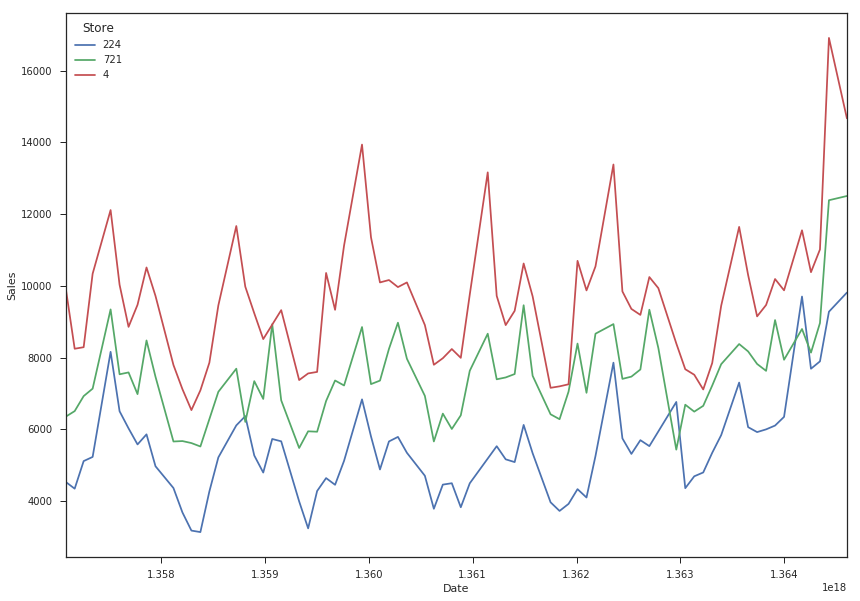

In [13]:
plt.figure(figsize=(14,10))
sns.tsplot(reduced_set, value='Sales', time = 'Date', 
           unit = 'Store', condition='Store')

# Examining Model Results

In [14]:
graph_set = X_valid[X_valid.Store.isin([4, 224, 721])]
print("Min:", min(X_valid.Date))
print("Max:", max(X_valid.Date))
X_valid.Store.unique().shape

Min: 2013-01-02 00:00:00
Max: 2015-07-31 00:00:00


(1115,)

In [21]:
graph_set[features].shape

(42, 16)

In [18]:
dtest = np.copy(graph_set[features].values)
test_frame = dtest.reshape((dtest.shape[0], 1, dtest.shape[1]) )
results = model.predict(test_frame)

In [19]:
results.shape

(42, 1)

In [29]:
results_analysis = graph_set
results_analysis['preds'] = np.exp(results) - 1 # reverse the conversion we started with
results_analysis['actuals'] = np.exp(y_valid) - 1 # reverse the conversion we started with

In [52]:
# piv the data for the plot
graphs = results_analysis[['Store', 'preds', 'actuals', 'Date']]
graphs_melt = pd.melt(graphs, id_vars = ['Store', 'Date'], 
        value_vars = ['preds', 'actuals'], 
        var_name = 'sales_type',
       value_name = 'sales')
graphs_melt['id'] = graphs_melt[['Store', 'sales_type']].apply(lambda x: '_'.join(x.astype(str)), axis = 1)

/home/brian/anaconda3/envs/tensorflow/lib/python3.5/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


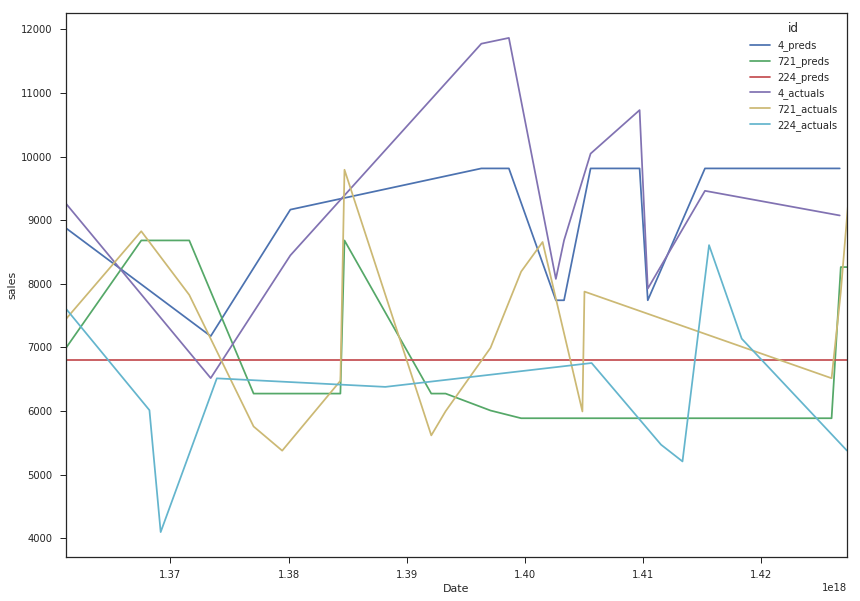

In [53]:
plt.figure(figsize=(14,10))
sns.tsplot(graphs_melt, value='sales', time = 'Date', 
           unit = 'id', condition='id')

# Look at Bias and Variance

In [64]:
full_analysis = X_valid

In [65]:
dvalid = np.copy(full_analysis[features].values)
validation_frame = dvalid.reshape((dvalid.shape[0], 1, dvalid.shape[1]) )
full_results = model.predict(validation_frame)

In [66]:
# Look at the direction of errors
full_analysis['preds'] = np.exp(full_results) - 1 # reverse the conversion we started with
full_analysis['actuals'] = np.exp(y_valid) - 1 # reverse the conversion we started with
full_analysis['error'] = full_analysis['preds'] - full_analysis['actuals'] 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb97ff83198>]], dtype=object)

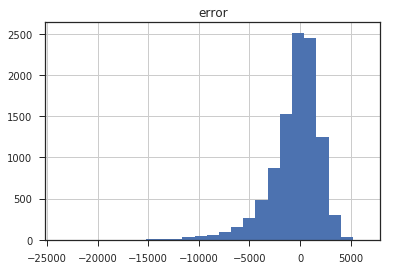

In [71]:
full_analysis.hist(column = 'error', bins = 25)

In [72]:
print('mean error: ', np.mean(full_analysis['error']))
print('std dev: ', np.std(full_analysis['error']))

mean error:  -533.680621489
std dev:  2551.10960895
